# 911 Calls Dataset

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

#### Importing the database

In [2]:
calls_df = pd.read_csv('911.csv')

#### Viewing first 5 rows of our database

In [3]:
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### Basic information about our database

In [4]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**What are the top 5 zipcodes for 911 calls?**

In [5]:
calls_df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**



In [6]:
calls_df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [7]:
calls_df['title'].nunique()

110

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.Create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.**

In [8]:
calls_df['reason'] = calls_df['title'].apply(lambda x: x.split(':')[0])
calls_df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

**What is the most common Reason for a 911 call based off of this new column?**

In [9]:
calls_df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

**Now use seaborn to create a countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='reason', ylabel='count'>

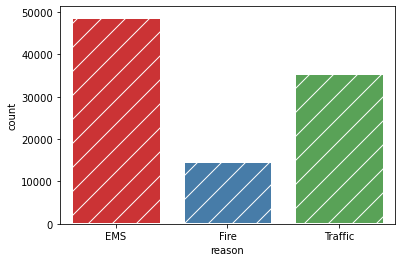

In [10]:
sns.countplot(x='reason', data=calls_df, lw=3, ec='white', hatch='/',palette='Set1')

**What is the data type of the objects in the timeStamp column?**

In [11]:
type(calls_df['timeStamp'].iloc[0])

str

**Convert the column from strings to DateTime objects.**

In [12]:
calls_df['timeStamp'] = pd.to_datetime(calls_df['timeStamp'])

In [13]:
calls_df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
reason               object
dtype: object

**Create 3 new columns called Hour, Month, and Day of Week.**

In [14]:
calls_df['Hour'] = calls_df['timeStamp'].dt.hour
calls_df['Month'] = calls_df['timeStamp'].dt.month
calls_df['Day'] = calls_df['timeStamp'].dt.dayofweek

**Map the actual string names to the day of the week:**

In [15]:
calls_df["week_map"] = calls_df['Day'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thurs', 4:'Fri',5:'Sat',6:'Sun'})

In [16]:
calls_df['week_map']

0        Thurs
1        Thurs
2        Thurs
3        Thurs
4        Thurs
         ...  
99487      Wed
99488      Wed
99489      Wed
99490      Wed
99491      Wed
Name: week_map, Length: 99492, dtype: object

**Create a countplot of the Day of Week column with the different Reasons present for contacting the police**

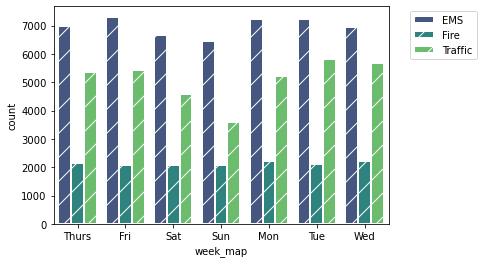

In [17]:
sns.countplot(x='week_map',data=calls_df,lw=2,ec='white',hue='reason',hatch='/',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1),loc='best')

#### Same as above for Month:

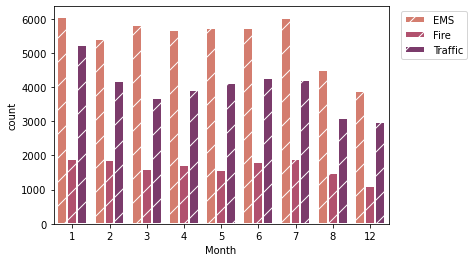

In [18]:
sns.countplot(x='Month',data=calls_df,lw=2,ec='white',hue='reason',hatch='/',palette='flare')
plt.legend(bbox_to_anchor=(1.25,1))

*The above graph is missing a few months therefore to recifty the error we can do the following:*

In [19]:
month_by=calls_df.groupby(calls_df['Month']).count()
month_by

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day,week_map
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

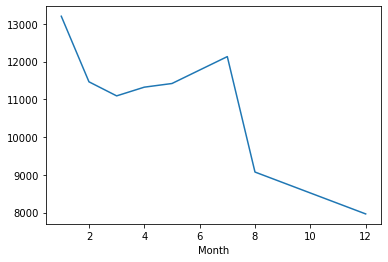

In [20]:
month_by['twp'].plot()

**Use seaborn's lmplot() to create a linear fit on the number of calls per month.**

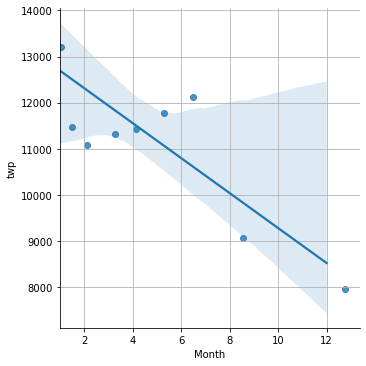

In [21]:
sns.lmplot(x='Month',y='twp',data=month_by.reset_index(),truncate=True,x_jitter=True,y_jitter=True)
plt.grid()

**Create a new column called 'Date' that contains the date from the timeStamp column.**

In [22]:
calls_df['date']=calls_df['timeStamp'].dt.date
calls_df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

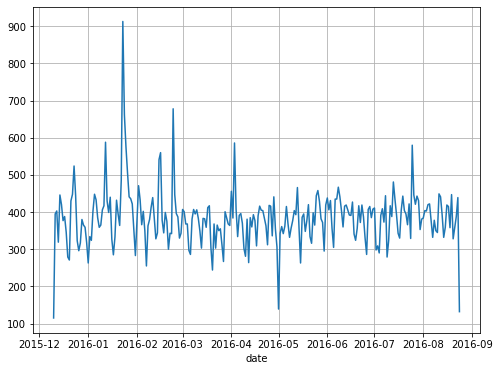

In [23]:
calls_df.groupby(calls_df['date']).count()['twp'].plot(figsize=(8,6))
plt.grid(linestyle='-')

**Recreate the above plot but create 3 separate plots with each plot representing a Reason for the 911 call**

Text(0.5, 1.0, 'Traffic')

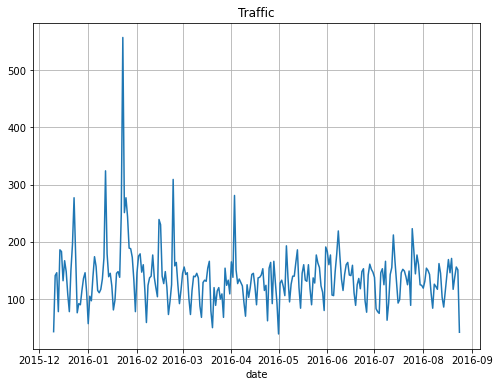

In [24]:
calls_df[calls_df['reason']=='Traffic'].groupby(calls_df['date']).count()['twp'].plot(figsize=(8,6))
plt.grid()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

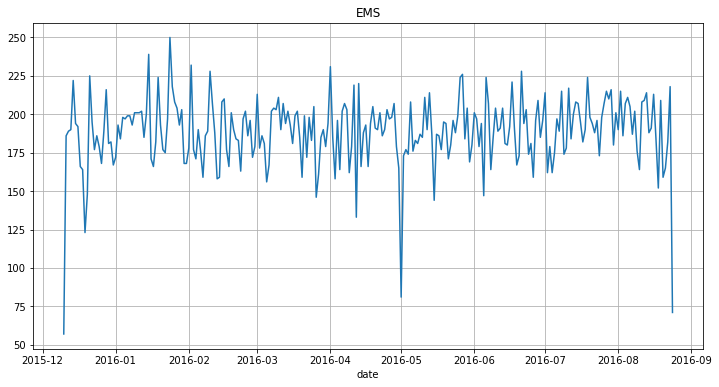

In [25]:
calls_df[calls_df['reason']=='EMS'].groupby(calls_df['date']).count()['twp'].plot(figsize=(12,6))
plt.grid()
plt.title('EMS')

Text(0.5, 1.0, 'Fire')

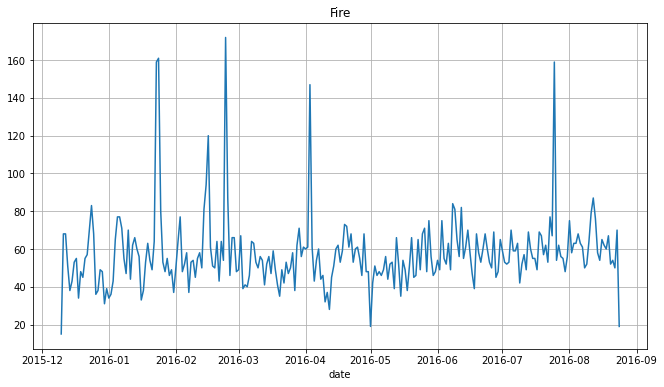

In [26]:
calls_df[calls_df['reason']=='Fire'].groupby(calls_df['date']).count()['twp'].plot(figsize=(11,6))
plt.grid()
plt.title('Fire')

**Restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [42]:
Hour_Day = calls_df.groupby(['Day','Hour']).count()['reason'].unstack()
Hour_Day

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
5,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
6,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


#### Create a heatmap of the data made above

<AxesSubplot:xlabel='Hour', ylabel='Day'>

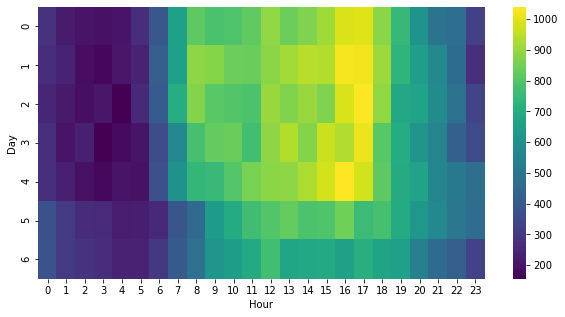

In [41]:
plt.figure(figsize=(10,5))
sns.heatmap(Hour_Day,cmap="viridis")

**Create a clustermap of the same data**

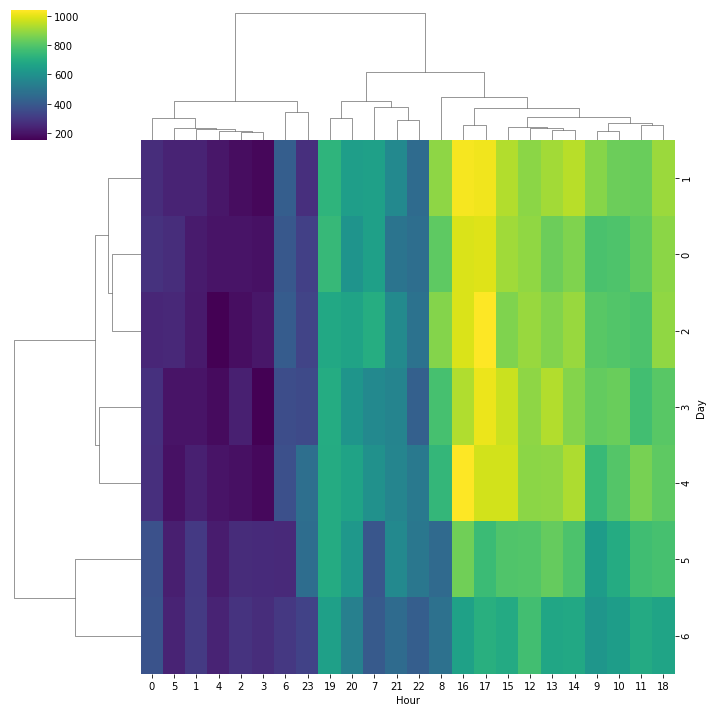

In [44]:
sns.clustermap(Hour_Day,cmap='viridis')

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [54]:
Day_Month = calls_df.groupby(['Day','Month']).count()['twp'].unstack()
Day_Month

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
0,1727,1964,1533,1597,1779,1617,1692,1509,1256
1,1973,1753,1884,1430,1917,1673,1668,1612,1233
2,1699,1902,1888,1517,1538,2054,1715,1295,1260
3,1584,1596,1900,1601,1590,2065,1646,1227,1265
4,1970,1581,1523,1958,1730,1649,2045,1310,1064
5,2290,1440,1264,1732,1444,1388,1695,1099,978
6,1960,1229,1100,1488,1422,1331,1672,1021,907


#### Create a heatmap of the above data

<AxesSubplot:xlabel='Month', ylabel='Day'>

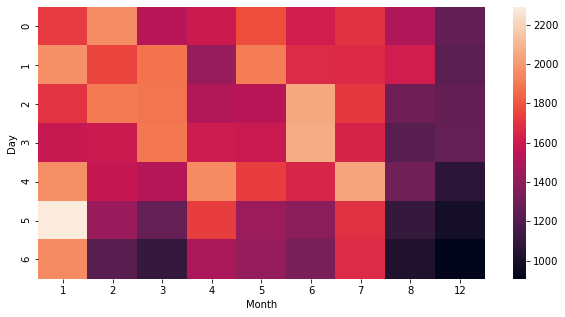

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(Day_Month)

**Create a clustermap of the same data**

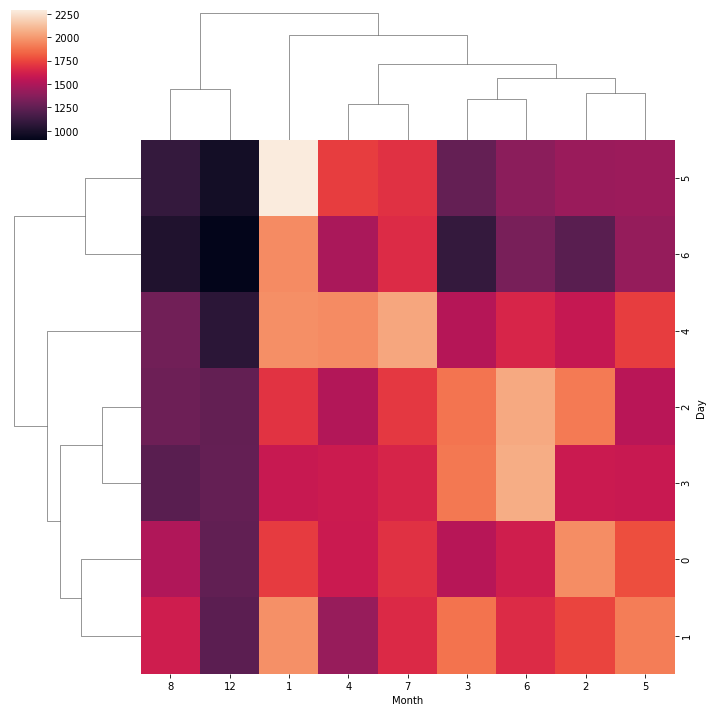

In [57]:
sns.clustermap(Day_Month)